In [509]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [510]:
imdb = pd.read_csv('./assests/imdb_rating.csv')
nf = pd.read_excel('./assests/netflix_data.xlsx')

In [511]:
nf.rename(columns={'title': 'MOVIES'}, inplace=True)


In [512]:
def clean_date(value):
    if not isinstance(value, str):
        return value
    value = value.replace('(', '').replace(')', '')
    if "–" in value:
        parts = value.split("–")
        if len(parts) > 1:
            return parts[1].strip() if parts[1].strip().isdigit() else parts[0].strip()
        return parts[0].strip()
    return value.strip() if value.strip().isdigit() else value

In [513]:
imdb['YEAR'] = imdb['YEAR'].apply(clean_date)

In [514]:
combined = pd.merge(imdb, nf, on='MOVIES')
int_cols = combined.select_dtypes(include=['number']).columns
combined[int_cols] = combined[int_cols].apply(lambda x: x.fillna(x.mean()))
combined = combined.drop(columns=['Gross', 'show_id'])

TOP 5 POPULAR SHOWS OR MOVIES FOR EACH YEAR

In [515]:
shows = combined[combined['type']=='TV Show']
movies = combined[combined['type']=='Movie']

In [516]:
top_show = shows.sort_values(by=['YEAR', 'RATING'], ascending=False)
top_five_show = top_show.groupby('YEAR').head(5)
top_five_show

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,type,director,cast,country,date_added,rating,duration,listed_in,description
2615,Life Sentence,TV Movie,"\nDrama, Sci-Fi",6.611325,"\nAs an alternative to jail, a criminal choose...",\n,NaN,79.749668,TV Show,NaN,Lucy Hale,United States,"June 23, 2018",TV-14,1 Season,TV Dramas,"Cured of what she thought was terminal cancer,..."
684,Wake Up,III 2019,"\nAction, Crime, Thriller",5.000000,\nA man wakes in a hospital bed with no recoll...,\n Director:\nAleksandr Chernyaev\n| \n ...,"2,995",92.000000,TV Show,NaN,"Jag Huang, Chris Wu, Tiffany Hsu, Michael Huan...",NaN,"March 31, 2018",TV-14,2 Seasons,"International TV Shows, TV Dramas","After taking the blame for a patient death, an..."
1080,Iris,III 2016,"\nDrama, Thriller",6.100000,"\nIris, young wife of a banker, disappears in ...",\n Director:\nJalil Lespert\n| \n Stars:...,"3,831",99.000000,TV Show,NaN,"Lee Byung-hun, Kim Tae-hee, Jeong Jun-ho, Kim ...",South Korea,"May 16, 2020",TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Ac...",Two friends' lives are changed forever when th...
602,Heist,III 2015,"\nAction, Crime, Drama",6.100000,\nA father is without the means to pay for his...,\n Director:\nScott Mann\n| \n Stars:\nR...,"28,949",93.000000,TV Show,NaN,NaN,NaN,"July 14, 2021",TV-MA,1 Season,"Crime TV Shows, Docuseries",Millions in stolen cash. Missing luxury bourbo...
2610,Marriage or Mortgage,II 2021,\nReality-TV,6.611325,\nA wedding planner and a real estate agent co...,\n,NaN,79.749668,TV Show,NaN,NaN,NaN,"March 10, 2021",TV-G,1 Season,"Reality TV, Romantic TV Shows",A wedding planner and a real estate agent comp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,Jeopardy!,1984,\nGame-Show,8.200000,\nA returning champion and two challengers tes...,"\n \n Stars:\nAlex Trebek, \nJoh...","6,528",30.000000,TV Show,NaN,Alex Trebek,United States,"December 18, 2020",TV-G,2 Seasons,Reality TV,Alex Trebek hosts one of TV's longest-running ...
911,Wheel of Fortune,1983,"\nFamily, Game-Show",6.700000,"\nHosted by Pat Sajak, this game show features...","\n \n Stars:\nPat Sajak, \nVanna...","2,827",30.000000,TV Show,NaN,"Pat Sajak, Vanna White",United States,"August 25, 2021",TV-G,3 Seasons,Reality TV,Pat Sajak and Vanna White host one of TV's mos...
653,Monty Python's Flying Circus,1974,\nComedy,8.800000,\nThe original surreal sketch comedy showcase ...,"\n \n Stars:\nGraham Chapman, \n...","69,552",30.000000,TV Show,NaN,"John Cleese, Graham Chapman, Terry Jones, Eric...",United Kingdom,"October 2, 2018",TV-14,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...
1839,Monty Python's Fliegender Zirkus,1972,\nComedy,8.200000,\nTwo parts Monty Python German television com...,"\n \n Stars:\nGraham Chapman, \n...","1,903",87.000000,TV Show,NaN,"Graham Chapman, John Cleese, Eric Idle, Terry ...","United Kingdom, West Germany","October 2, 2018",TV-MA,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...


In [517]:
top_movie = movies.sort_values(by=['YEAR', 'RATING'], ascending=False)
top_five_movie = top_movie.groupby('YEAR').head(5)
top_five_movie

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,type,director,cast,country,date_added,rating,duration,listed_in,description
2530,The Bridge,XIV 2017,\nDrama,5.4,\nA Yoruba prince and a young lady from a prom...,\n Director:\nKunle Afolayan\n| \n Stars...,30,115.0,Movie,Kunle Afolayan,"Chidinma Ekile, Ademola Adedoyin, Kunle Afolay...",Nigeria,"September 1, 2019",TV-14,119 min,"Dramas, International Movies, Romantic Movies",A Yoruba prince and a young lady from a promin...
2162,Follow Me,VI 2018,\nDocumentary,5.1,\nAfter hearing that some people get paid $500...,\n Director:\nAsri Bendacha\n,250,80.0,Movie,Asri Bendacha,Asri Bendacha,"United Arab Emirates, United States, United Ki...","November 16, 2018",TV-MA,86 min,"Documentaries, International Movies",Aspiring to be an internet celebrity and make ...
2605,Refugee,VI 2016,"\nDocumentary, Short",6.6,\nFive acclaimed photographers travel the worl...,\n Director:\nClementine Malpas\n| \n St...,23,23.0,Movie,"Clementine Malpas, Leslie Knott","Cate Blanchett, Lynsey Addario, Omar Victor Di...",NaN,"March 10, 2017",TV-PG,24 min,Documentaries,Five acclaimed photographers travel the world ...
1403,Home,VI 2014,\nHorror,4.8,\nA real-estate agent finds herself caught up ...,\n Director:\nNicholas McCarthy\n| \n St...,"6,949",91.0,Movie,Tim Johnson,"Jim Parsons, Rihanna, Steve Martin, Jennifer L...",United States,"May 25, 2021",PG,94 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When misfit alien Oh mistakenly sends a party ...
1843,Joy,V 2018,\nDrama,6.6,"\nJoy, a young Nigerian woman caught in the vi...",\n Director:\nSudabeh Mortezai\n| \n Sta...,"1,218",99.0,Movie,Sudabeh Mortezai,"Anwulika Alphonsus, Mariam Precious Sanusi, An...",Austria,"May 24, 2019",TV-MA,101 min,"Dramas, Independent Movies, International Movies","Close to paying off her debts, a Nigerian sex ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Star Trek,1969,"\nAction, Adventure, Sci-Fi",8.3,"\nIn the 23rd Century, Captain James T. Kirk a...","\n \n Stars:\nWilliam Shatner, \...","76,213",50.0,Movie,J.J. Abrams,"Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...","United States, Germany","July 1, 2021",PG-13,128 min,"Action & Adventure, Sci-Fi & Fantasy",On their first voyage aboard the starship Ente...
257,Rosemary's Baby,1968,"\nDrama, Horror",8.0,\nA young couple trying for a baby move into a...,\n Director:\nRoman Polanski\n| \n Stars...,"201,472",137.0,Movie,Roman Polanski,"Mia Farrow, John Cassavetes, Ruth Gordon, Sidn...",United States,"November 1, 2019",R,137 min,"Classic Movies, Horror Movies, Thrillers",A woman is thrilled to find out she's pregnant...
1643,Nazi Concentration Camps,1945,"\nDocumentary, History",8.3,\nProduced and presented as evidence at the Nu...,\n Director:\nGeorge Stevens\n| \n Stars...,"1,358",59.0,Movie,George Stevens,NaN,United States,"March 31, 2017",TV-MA,59 min,"Classic Movies, Documentaries",Shocking footage shows Nazi concentration camp...
2377,Know Your Enemy - Japan,1945,"\nDocumentary, History, War",6.0,\nA comprehensive look at the war in the Pacif...,"\n Directors:\nFrank Capra, \nJoris Ivens\n...",764,63.0,Movie,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,"March 31, 2017",TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...


Find what genre of movies are most popular (top 10) and show in a bar graph.

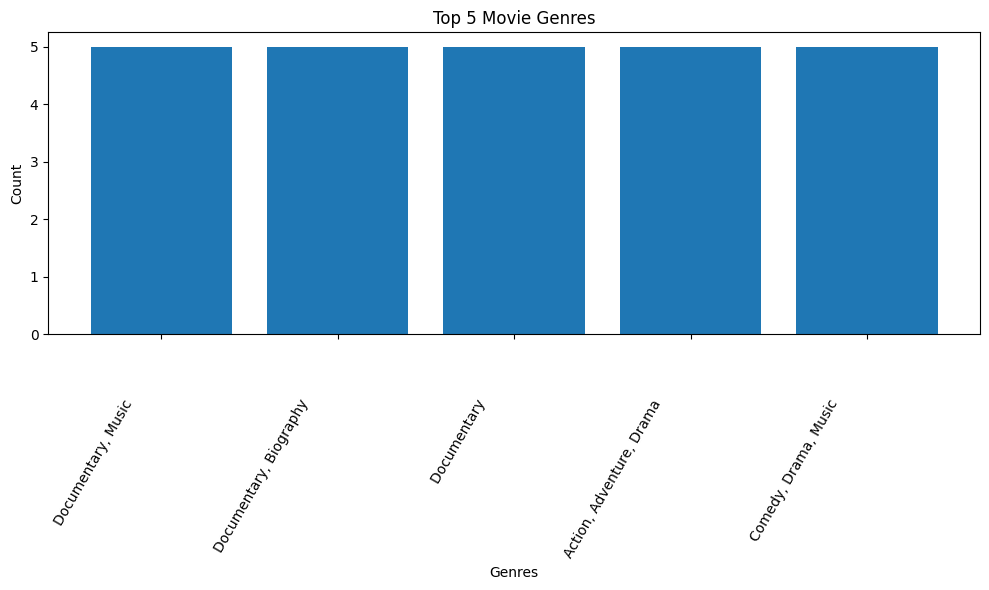

In [518]:
plt.figure(figsize=(10, 6))
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 5 Movie Genres')
movie_genre = movies.sort_values(by='RATING', ascending=False)
plt.xticks(rotation=60, ha='right')

plt.bar(movie_genre['GENRE'].head(5), height=5)
plt.tight_layout()
plt.show()

Plot the distribution of values of ‘RATING’ column of imdb dataset using histogram plot and in a box plot. Also identify outlier values using the box plot.

In [519]:
imdb['RATING'].fillna(imdb['RATING'].mean())

0       6.100000
1       5.000000
2       8.200000
3       9.200000
4       6.921176
          ...   
9994    6.921176
9995    6.921176
9996    6.921176
9997    6.921176
9998    6.921176
Name: RATING, Length: 9999, dtype: float64

In [520]:
imdb['RATING'] = pd.to_numeric(imdb['RATING'], errors='coerce')

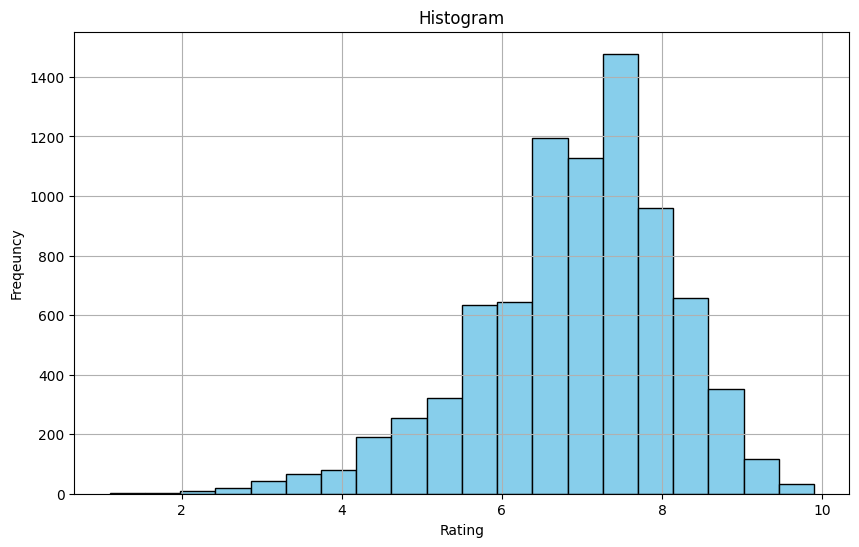

In [521]:
#histogram
plt.figure(figsize=(10, 6))
plt.hist(imdb['RATING'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Freqeuncy')
plt.title('Histogram')
plt.grid(True)
plt.show()

Text(0.5, 0, 'Rating')

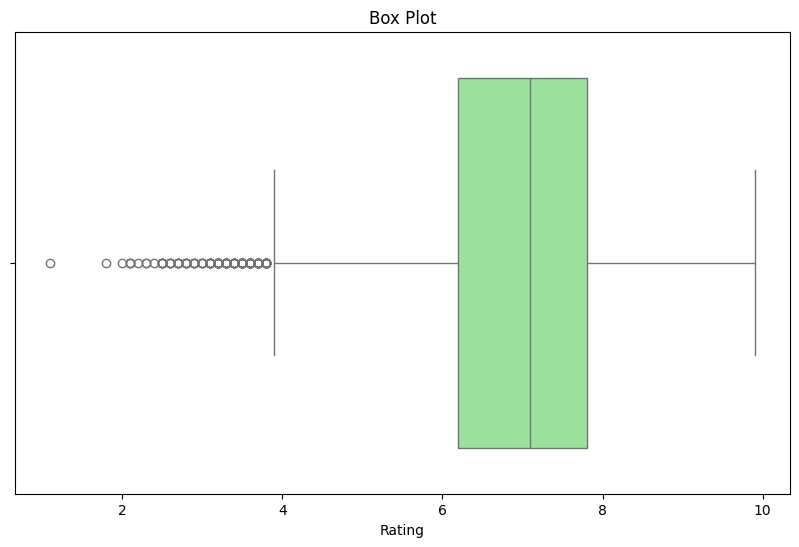

In [522]:
#boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x=imdb['RATING'], color='lightgreen')
plt.title('Box Plot')
plt.xlabel('Rating')

In [523]:
q1 = imdb['RATING'].quantile(0.25)
q3 = imdb['RATING'].quantile(0.75)
x = q3-q1
l = q3-1.5*x
h = q3+1.5*x
outliners = imdb[(imdb['RATING']<l) | (imdb['RATING']>h)]
outliners

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
25,Chernobyl,2021,"\nDrama, History, Romance",5.0,\nA story about a heroic fireman who worked as...,\n Director:\nDanila Kozlovskiy\n| \n St...,"4,681",136.0,NaN
56,365 dni,2020,"\nDrama, Romance",3.3,\nMassimo is a member of the Sicilian Mafia fa...,"\n Directors:\nBarbara Bialowas, \nTomasz M...","63,620",114.0,NaN
157,Bartkowiak,2021,"\nAction, Crime, Sport",5.0,"\nAfter his brother dies in a car crash, a dis...",\n Director:\nDaniel Markowicz\n| \n Sta...,398,91.0,NaN
170,Hostage House,2021,\nThriller,3.7,\nWhen an ambitious realtor and her daughter a...,\n Director:\nDavid Benullo\n| \n Stars:...,315,85.0,NaN
...,...,...,...,...,...,...,...,...,...
9001,Super Monsters,2017,"\nAnimation, Adventure, Comedy",4.7,\nThe Super Monsters celebrate Día de Los Muer...,"\n \n Stars:\nNicole Anthony, \n...",29,25.0,NaN
9026,StarBeam,2020,"\nAnimation, Action, Adventure",4.8,\nAdd a Plot\n,\n Director:\nJon Izen\n| \n Stars:\nTer...,12,33.0,NaN
9278,Super Monsters,2017,"\nAnimation, Adventure, Comedy",4.7,\nWhen Santa needs serious help prepping all o...,"\n \n Stars:\nElyse Maloway, \nA...",35,24.0,NaN
9375,Surviving Death,2021,"\nDocumentary, Reality-TV",4.8,"\nPoised between life and death, mediums promi...",\n Director:\nRicki Stern\n,174,57.0,NaN


Explore which country produces the most shows and movies (separately) and how popular they are (find the rating of top movies and shows for the country producing most shows and movies).

In [524]:
combined.drop(columns=['ONE-LINE', 'date_added', 'duration', 'listed_in', 'description', 'rating'], inplace=True)
combined

,MOVIES,YEAR,GENRE,RATING,STARS,VOTES,RunTime,type,director,cast,country
0,Blood Red Sky,2021,"\nAction, Horror, Thriller",6.100000,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.000000,Movie,Peter Thorwarth,"Peri Baumeister, Alexander Scheer, Kais Setti,...",NaN
1,Masters of the Universe: Revelation,2021,"\nAnimation, Action, Adventure",5.000000,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.000000,TV Show,NaN,"Mark Hamill, Lena Headey, Chris Wood, Sarah Mi...",NaN
2,The Walking Dead,2022,"\nDrama, Horror, Thriller",8.200000,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.000000,TV Show,NaN,"Andrew Lincoln, Steven Yeun, Norman Reedus, Ch...",United States
3,Outer Banks,2020,"\nAction, Crime, Drama",7.600000,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.000000,TV Show,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",United States
4,Dexter,2013,"\nCrime, Drama, Mystery",8.600000,"\n \n Stars:\nMichael C. Hall, \...","665,387",53.000000,TV Show,NaN,"Michael C. Hall, Jennifer Carpenter, David Zay...",United States
...,...,...,...,...,...,...,...,...,...,...,...
2622,Extracurricular,NaN,NaN,6.611325,\n,NaN,79.749668,TV Show,NaN,"Kim Dong-hee, Jung Da-bin, Park Ju-hyun, Nam Y...",South Korea
2623,Arango y Sanint: Ríase el show,2018 TV Special,\nComedy,4.000000,"\n Directors:\nRaúl Campos, \nJan Suter\n| ...",40,79.749668,Movie,"Raúl Campos, Jan Suter","Julián Arango, Antonio Sanint",Colombia
2624,Sebastián Marcelo Wainraich,2018 TV Special,\nComedy,6.300000,"\n Directors:\nRaúl Campos, \nJan Suter\n| ...",99,79.749668,Movie,"Raúl Campos, Jan Suter",Sebastián Marcelo Wainraich,Argentina
2625,Metro,2008,\nDrama,6.611325,\n Director:\nChristopher Dorrah\n| \n S...,NaN,120.000000,Movie,Ananda Krishnan,"Yogi Babu, Bobby Simha, Shirish",India


In [525]:
combined = combined.dropna(subset=['country'])
shows = combined[combined['type']=='TV Show']
movies = combined[combined['type']=='Movie']

In [526]:
print("Shows:", shows['country'].value_counts().idxmax(), "RATING", shows[shows['country']==shows['country'].value_counts().idxmax()]['RATING'].iloc[0])
print("Movies:", movies['country'].value_counts().idxmax(), "RATING", movies[movies['country']==movies['country'].value_counts().idxmax()]['RATING'].iloc[0])

Shows: United States RATING 8.2
Movies: United States RATING 5.8


Shows/Movies by which director is popular (Find top 10 directors) and all genres for the movies or shows that they made.

In [527]:
combined = combined.dropna(subset=['director'])
shows = combined[combined['type']=='TV Show']
movies = combined[combined['type']=='Movie']

In [528]:
directors_shows = shows['director'].value_counts().head(10)
for i in directors_shows.index:
    print(i)
    genre = combined[combined['director']==i]['GENRE']
    cleaned_genres = genre.str.replace('\n', '').str.strip()
    split_genre = cleaned_genres.str.strip().explode().str.strip()
    print(split_genre.unique())
    print('-------------------------------------------------------')

Kim Seong-hun
['Action, Drama, History' 'Drama' 'Animation, Action, Drama']
-------------------------------------------------------
Iginio Straffi
['Animation, Action, Comedy' 'Comedy, Drama, Family']
-------------------------------------------------------
Phil Sgriccia
['Drama, Fantasy, Horror']
-------------------------------------------------------
Danny Cannon
['Action, Crime, Drama']
-------------------------------------------------------
James Bamford
['Action, Adventure, Crime']
-------------------------------------------------------
Glen Winter
['Action, Adventure, Drama']
-------------------------------------------------------
Jesse Warn
['Action, Adventure, Drama']
-------------------------------------------------------
Lee Toland Krieger
['Crime, Drama, Romance']
-------------------------------------------------------
Thomas Astruc
['Animation, Action, Adventure']
-------------------------------------------------------
Hayato Date
['Animation, Action, Adventure']
-----------

In [529]:
directors_movies = movies['director'].value_counts().head(10)
for i in directors_movies.index:
    print(i)
    genre = combined[combined['director']==i]['GENRE']
    cleaned_genres = genre.str.replace('\n', '').str.strip()
    split_genre = cleaned_genres.str.strip().explode().str.strip()
    print(split_genre.unique())
    print('-------------------------------------------------------')

Jay Karas
['Action, Comedy, Family' 'Comedy' 'Documentary, Comedy']
-------------------------------------------------------
Marcus Raboy
['Comedy' 'Documentary, Comedy']
-------------------------------------------------------
Raúl Campos, Jan Suter
['Comedy']
-------------------------------------------------------
Jay Chapman
['Comedy' 'Documentary, Comedy']
-------------------------------------------------------
Troy Miller
['Comedy' 'Documentary, Comedy']
-------------------------------------------------------
Ryan Polito
['Comedy']
-------------------------------------------------------
Lance Bangs
['Comedy']
-------------------------------------------------------
Jesse V. Johnson
['Action, Crime' 'Action, Comedy' 'Action, Drama']
-------------------------------------------------------
Kunle Afolayan
['Drama, Thriller' 'Comedy' 'Mystery' 'Drama']
-------------------------------------------------------
Shaun Paul Piccinino
['Comedy, Drama, Romance' 'Drama, Romance' 'Sport' 'Comedy']


Find the most occurring user viewership category (i.e. ‘rating’ column of the imdb dataset) for the 100 highest voted movies/shows of each year and for each top 10 countries (top countries based on number of shows produced).

In [570]:
combined = combined.dropna(subset=['VOTES'])
combined = combined.sort_values(by=['VOTES'], ascending=False)

In [582]:
combined['VOTES'] = pd.to_numeric(combined['VOTES'], errors='coerce')
top_100 = combined.groupby('YEAR').apply(lambda x: x.nlargest(100, 'VOTES')).reset_index(drop=True)
top_10 = combined['country'].value_counts().head(10).index
top_10 = combined[combined['country'].isin(top_10)]
ratings_per_year = top_100.groupby('YEAR')['RATING'].apply(lambda x: x.mode()[0])
rating_per_country = top_10.groupby('country')['RATING'].apply(lambda x:x.mode()[0])

C:\Users\isang\AppData\Local\Temp\ipykernel_14824\4234224808.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_100 = combined.groupby('YEAR').apply(lambda x: x.nlargest(100, 'VOTES')).reset_index(drop=True)


In [584]:
rating_per_country

country
Canada            2.9
India             5.2
Indonesia         4.0
Mexico            5.7
Nigeria           6.5
South Korea       4.9
Taiwan            3.0
Thailand          5.2
United Kingdom    6.4
United States     7.3
Name: RATING, dtype: float64

In [585]:
ratings_per_year

YEAR
1944               5.9
1945               6.0
1973               5.2
1987 TV Special    7.3
1988 TV Movie      7.3
                  ... 
IV 2018            4.3
IV 2021            6.5
V 2016             6.4
VI 2018            5.1
XIV 2017           5.4
Name: RATING, Length: 66, dtype: float64